# 2022-12-14

## Performance Summary
Inital p1: 54.1 ms ± 1.07 ms

Initial p2: 2.79 s ± 18.5 ms

## Initial solution

Woke up att 5:50am (~Midnight UTC-5) and did Puzzle 1 on time. Puzzle 2 was not solved undistrupted.
```
      --------Part 1--------   --------Part 2--------
Day       Time   Rank  Score       Time   Rank  Score
 14   02:58:29   9411      0   04:16:53  10637      0

```

### Puzzle 1 & 2

Today is a classbased approached. We initialise the grid by creating ranges between traces and then iterate through the range entries to fill the cave/grid with rocks. We then spawn a grain of sand at 500, 0 and move it according to the rules. The simulation terminates when either the spawn node has sand on it or if the check has reached the bottom of the grid.

Simulation terminated with 614 sand grains


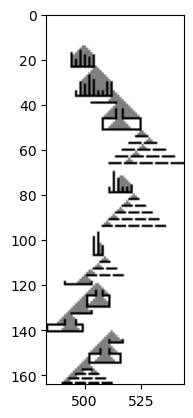

Simulation terminated with 26170 sand grains


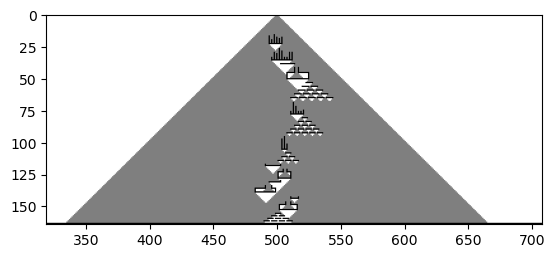

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Build ranges between two points
class Cave():
    def __init__(self, scan, p1=True) -> None:
        self.scan = scan
        self.sand = 0
        self.terminated = False
        self.p1 = p1
        self.fetchRocks()
        self.buildCave()
    
    # Fetch all rocks and properties of the cave
    def fetchRocks(self) -> None:
        self.rocks = {r for trace in self.scan[:] for i in range(len(trace) - 1) for r in self.drawLine(*trace[i:i+2])}
        self.min_x, self.max_x = min(self.rocks)[0], max(self.rocks)[0]
        self.min_y,self.max_y = min(self.rocks, key=lambda x: x[1])[1], max(self.rocks, key=lambda x: x[1])[1]
    
    # Build ranges between two points
    def drawLine(self, a, b) -> list:
        sign_x, sign_y = (np.sign(b[0] - a[0]), np.sign(b[1] - a[1]))
        rs = lambda s: s if s != 0 else 1
        rng = lambda a, b, s: range(a, b + (1 * rs(s)), rs(s))
        rng_x, rng_y = rng(a[0], b[0], sign_x), rng(a[1], b[1], sign_y)
        return [(x, y) for x in rng_x for y in rng_y]

    def buildCave(self) -> None:
        self.b_padding = 0 if self.p1 else 2
        self.x_padding = 0 if self.p1 else self.max_y
        shape_x = 1 + self.max_x - self.min_x + 2 * self.x_padding
        shape_y = 1 + self.max_y + self.b_padding
        self._cave = np.full((shape_x, shape_y), 0)
        for x, y in self.rocks:
           self.set(x, y, 2)
        if not self.p1:
            left_point = (self.min_x - self.x_padding, self.max_y + self.b_padding)
            right_point = (self.max_x + self.x_padding, self.max_y + self.b_padding)
            for x, y in self.drawLine(left_point, right_point):
                self.set(x, y, 2)
            
            
    def check(self, x, y) -> int:
        return self._cave[x - self.min_x + self.x_padding, y]
    
    def set(self, x, y, val) -> None:
        self._cave[x - self.min_x + self.x_padding, y] = val
        
    def run_simulation(self, disp=True) -> None:
        while(not self.terminated):
            self.update()
        if disp : print("Simulation terminated with", self.sand, "sand grains")
        if disp: self.display()
        
    def update(self) -> None:
        diag = lambda point, direction, steps: (point[0] - direction * steps, point[1] + 1 * steps)
        down = lambda point: (point[0], point[1] + 1)
        
        point = (500, 0)
        at_rest = False
        while not at_rest:
            if point[1] >= (self.max_y + self.b_padding):
                self.terminated = True
                return
            if self.check(*(500,0)) == 1:
                self.terminated = True
                return
            if self.check(*down(point))  == 0:
                point = down(point)
            elif self.check(*diag(point, 1, 1)) == 0:
                point = diag(point, 1, 1)
            elif self.check(*diag(point, -1, 1)) == 0:
                point = diag(point, -1, 1)
            else:
                at_rest = True
        self.set(*point, 1)
        self.sand += 1
    
    def display(self, input_cave=None) -> None:
        cave = self._cave if input_cave is None else input_cave
        disp_cave = np.flip(np.rot90(cave, -1), 1)
        min_x = self.min_x - self.x_padding
        max_x = self.max_x + self.x_padding
        plt.imshow(disp_cave, extent=[min_x, max_x, self.max_y, 0], cmap="binary", aspect="equal")
        plt.show()
        
# Input data
scan = [list(map(eval, x.split(" -> "))) for x in open("data/day-14.txt").read().splitlines()]
# Build Cave P1
cave = Cave(scan, p1=True)
cave.run_simulation()

# Build Cave P2
cave = Cave(scan, p1=False)
cave.run_simulation()

# Learnings

Slow today as well, maybe this is my true speed? Regardless, a nice puzzle. P2 was meerely an extention of the first with grid padding. 

# Runtimes

In [10]:
%%timeit
cave = Cave(scan, p1=True)
cave.run_simulation(disp=False)

54.1 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
%%timeit
cave = Cave(scan, p1=False)
cave.run_simulation(disp=False)

2.79 s ± 18.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
